In [ ]:
# Linear Regression and Gradient Descent

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [4]:
# importing data
data_ex1 = pd.read_csv('lin_reg_data.txt', names=['Population', 'Profit'])
data_ex1.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [5]:
# check null values

data_ex1.isnull().sum()

Population    0
Profit        0
dtype: int64

In [6]:
# check some statistic measures

data_ex1.describe()


,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


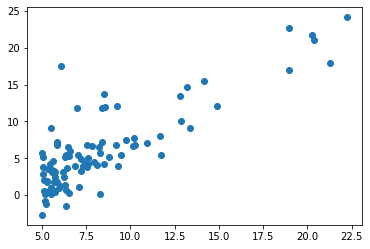

In [7]:
# plot the row data

plt.scatter(data_ex1.Population,  data_ex1.Profit)
plt.show()

# Implement fit() function for training data

In [8]:
def fit(X, y):

        X_mean = np.mean(X)
        y_mean = np.mean(y)

        # variables for counting slope equation
        numerator = 0
        denominator = 0

        # slop equation for each sample
        for i in range(len(X)):
            numerator += (X[i] - X_mean) * (y[i] - y_mean)
            denominator += np.square(X[i] - X_mean)

        slope = numerator / denominator
        intercept = y_mean - slope * X_mean

        return intercept, slope

# Implement Gradient Descent algorithm

In [9]:
def gradient_descent(x, y, epochs, learning_rate):
    intercept = 0
    slope = 0
    n = len(x)
    cost_store = []

    for i in range(epochs):

        y_predicted = intercept + slope * x

        # cost function
        cost_function = 1/n * sum([value**2 for value in (y - y_predicted)])
        cost_store.append(cost_function)

        # count derivatives for intercept and slope values
        intercept_deriv = (-2/n) * sum(y - y_predicted)
        slope_deriv = (-2/n) * sum((y - y_predicted) * x)

        # update intercept and slope values
        intercept -= intercept_deriv * learning_rate
        slope -= slope_deriv * learning_rate


        # stop decrease cost when cost_value will not change in valuable amount
        if i > 1 and math.isclose(cost_function, cost_store[-2], rel_tol=1e-10, abs_tol=0.001):
            break

    return intercept, slope, cost_function

In [10]:
x = data_ex1.Population  # independent variable
y = data_ex1.Profit      # dependent variable

In [11]:
# train data with implemented fit() function

icp, sl = fit(x, y)
print(f'intercept: {icp}, \nslope: {sl}')

intercept: -3.8957808783118537, 
slope: 1.193033644189594


In [12]:
# optimize Loss function with implemented gradient_descent() function

intercept, slope, cost = gradient_descent(x, y, 50, 0.08)
print(f'intercept: {intercept}, \nslope: {slope}, \ncost: {cost}')

intercept: -1.3828793111991475e+53, 
slope: -1.3765355907239636e+54, 
cost: 1.0650416295759387e+108


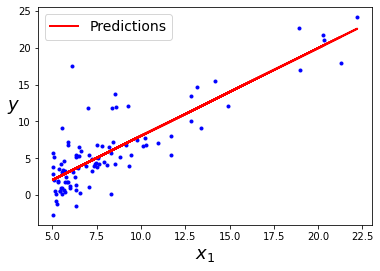

In [13]:
# plot fitted line

plt.plot(x, y, "b.")
predicted = sl * x + icp
plt.plot(x, predicted, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.show()


# Using Normal Equation and optimize with Gradient Descent


In [18]:
# using Normal Equation
X = np.matrix(x.values)
Y = np.matrix(y.values)

theta_best = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
predict = X.dot(theta_best)